# Predictive Analysis

In [10]:
#Using Penalty data set to determine if there is an association between the race of a victim vs the race of the defendant

import pandas as pd
import numpy as np
import sklearn
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')


In [4]:
Data = pd.read_csv('./Penalty.csv', header=0)
print (Data.head())

   death  blackd  whitvic  serious  culp  serious2      slogs
0      0       1        0      7.1     2  3.400000  13.916673
1      1       0        1     11.5     5  4.666667  28.086991
2      0       0        0      6.0     2  3.000000  10.750557
3      0       0        1      8.4     4  3.200000  17.877146
4      1       1        0     12.2     5  4.200000  30.517519


In [8]:
Data.describe()

,death,blackd,whitvic,serious,culp,serious2,slogs
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,0.340136,0.496599,0.598639,7.878912,2.299320,3.347506,16.965254
std,0.475374,0.501698,0.491850,3.194880,1.541281,0.936576,9.536581
min,0.000000,0.000000,0.000000,1.400000,1.000000,1.000000,0.471061
25%,0.000000,0.000000,0.000000,5.300000,1.000000,2.600000,8.838846
50%,0.000000,0.000000,1.000000,8.000000,2.000000,3.400000,16.635532
75%,1.000000,1.000000,1.000000,10.191667,4.000000,4.000000,23.661247
max,1.000000,1.000000,1.000000,13.800000,5.000000,5.000000,36.220427


In [9]:
Data['death'].dtype

dtype('int64')

In [11]:
#Setting 'death' as the target variable and applying logistic regression
from sklearn.linear_model import LogisticRegression

In [15]:
Target = Data.get(['death'])
print Target.head()

   death
0      0
1      1
2      0
3      0
4      1


In [16]:
X=Data.get(['blackd','whitvic','serious','culp'])
print X.head()

   blackd  whitvic  serious  culp
0       1        0      7.1     2
1       0        1     11.5     5
2       0        0      6.0     2
3       0        1      8.4     4
4       1        0     12.2     5


In [17]:
model = LogisticRegression()
model = model.fit(X, Target)

C:\Users\mimclean\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
model.score(X, Target)

0.84353741496598644

In [19]:
# To get the coefficients of the model
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,blackd,[0.62088731707]
1,whitvic,[0.111226200128]
2,serious,[-0.0995962182559]
3,culp,[1.0515786621]


In [21]:
from sklearn.cross_validation import train_test_split
# 80% train, 20% validation
X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size=0.2, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

C:\Users\mimclean\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
predicted = model2.predict(X_test)
print predicted

[1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1]


In [24]:
from sklearn import metrics

probs = model2.predict_proba(X_test)
print probs

print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

[[ 0.20285716  0.79714284]
 [ 0.90670893  0.09329107]
 [ 0.88644654  0.11355346]
 [ 0.82190353  0.17809647]
 [ 0.09247309  0.90752691]
 [ 0.64111192  0.35888808]
 [ 0.65354243  0.34645757]
 [ 0.89426536  0.10573464]
 [ 0.89049128  0.10950872]
 [ 0.81028107  0.18971893]
 [ 0.85105792  0.14894208]
 [ 0.11889087  0.88110913]
 [ 0.84474869  0.15525131]
 [ 0.79138495  0.20861505]
 [ 0.21827104  0.78172896]
 [ 0.77336118  0.22663882]
 [ 0.82895316  0.17104684]
 [ 0.19707416  0.80292584]
 [ 0.25010172  0.74989828]
 [ 0.87137196  0.12862804]
 [ 0.34141522  0.65858478]
 [ 0.81727454  0.18272546]
 [ 0.32361019  0.67638981]
 [ 0.89002382  0.10997618]
 [ 0.82747806  0.17252194]
 [ 0.74947995  0.25052005]
 [ 0.82711757  0.17288243]
 [ 0.81951583  0.18048417]
 [ 0.92156442  0.07843558]
 [ 0.17710044  0.82289956]]
0.8
0.837320574163


C:\Users\mimclean\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


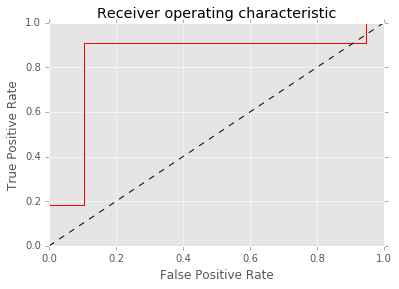

In [25]:
from sklearn.metrics import roc_curve as sk_roc_curve
import matplotlib.pyplot as pl
%matplotlib inline

def plot(y_test, predicted):
    fpr, tpr, thresholds = sk_roc_curve(y_test, predicted)
    
    # Plot ROC curve
    pl.clf()
    pl.plot(fpr, tpr, "r")
    pl.plot([0, 1], [0, 1], 'k--')
    pl.xlim([0.0, 1.0])
    pl.ylim([0.0, 1.0])
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title('Receiver operating characteristic')
    pl.legend(loc="lower right")
    pl.show()

plot(y_test, probs[:, 1])

In [26]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[17  2]
 [ 4  7]]
             precision    recall  f1-score   support

          0       0.81      0.89      0.85        19
          1       0.78      0.64      0.70        11

avg / total       0.80      0.80      0.80        30



In [27]:
# Using the log of the 'serious' variable as a predictor instead of 'serious'
X2=Data.get(['blackd','whitvic','slogs','culp'])
print X2.head()

   blackd  whitvic      slogs  culp
0       1        0  13.916673     2
1       0        1  28.086991     5
2       0        0  10.750557     2
3       0        1  17.877146     4
4       1        0  30.517519     5


In [28]:
model.score(X2, Target)

0.80272108843537415

In [29]:
pd.DataFrame(zip(X2.columns, np.transpose(model.coef_)))

,0,1
0,blackd,[0.62088731707]
1,whitvic,[0.111226200128]
2,slogs,[-0.0995962182559]
3,culp,[1.0515786621]


In [30]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Target, test_size=0.2, random_state=0)
model3 = LogisticRegression()
model3.fit(X2_train, y2_train)

C:\Users\mimclean\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
predicted_new = model3.predict(X2_test)
print predicted_new

[1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1]


In [32]:
probs_new = model3.predict_proba(X2_test)
print probs_new

print metrics.accuracy_score(y2_test, predicted_new)
print metrics.roc_auc_score(y2_test, probs_new[:, 1])

[[ 0.20175607  0.79824393]
 [ 0.88723366  0.11276634]
 [ 0.86986062  0.13013938]
 [ 0.79294112  0.20705888]
 [ 0.11322091  0.88677909]
 [ 0.65853397  0.34146603]
 [ 0.62829148  0.37170852]
 [ 0.88685392  0.11314608]
 [ 0.8731774   0.1268226 ]
 [ 0.84422158  0.15577842]
 [ 0.84865945  0.15134055]
 [ 0.12350103  0.87649897]
 [ 0.83970333  0.16029667]
 [ 0.7761123   0.2238877 ]
 [ 0.25148938  0.74851062]
 [ 0.7454517   0.2545483 ]
 [ 0.80694595  0.19305405]
 [ 0.23735666  0.76264334]
 [ 0.25395918  0.74604082]
 [ 0.85812713  0.14187287]
 [ 0.34161075  0.65838925]
 [ 0.82769411  0.17230589]
 [ 0.37794372  0.62205628]
 [ 0.87784517  0.12215483]
 [ 0.84984894  0.15015106]
 [ 0.73550648  0.26449352]
 [ 0.80536461  0.19463539]
 [ 0.84699906  0.15300094]
 [ 0.90842372  0.09157628]
 [ 0.18063683  0.81936317]]
0.8
0.842105263158


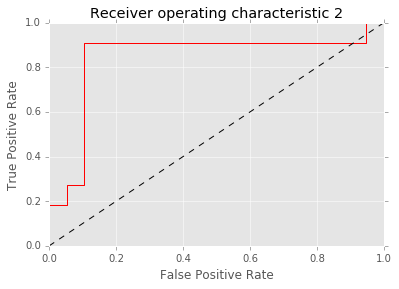

In [33]:
def plot(y2_test, predicted_new):
    fpr, tpr, thresholds = sk_roc_curve(y2_test, predicted_new)
    
    # Plot ROC curve
    pl.clf()
    pl.plot(fpr, tpr, "r")
    pl.plot([0, 1], [0, 1], 'k--')
    pl.xlim([0.0, 1.0])
    pl.ylim([0.0, 1.0])
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title('Receiver operating characteristic 2')
    pl.legend(loc="lower right")
    pl.show()

plot(y2_test, probs_new[:, 1])

In [34]:
print metrics.confusion_matrix(y2_test, predicted_new)
print metrics.classification_report(y2_test, predicted_new)

[[17  2]
 [ 4  7]]
             precision    recall  f1-score   support

          0       0.81      0.89      0.85        19
          1       0.78      0.64      0.70        11

avg / total       0.80      0.80      0.80        30

